In [38]:
import os
from crater_cnn import Network
from crater_plots import plot_image, plot_conv_weights, plot_conv_layer
from crater_preprocessing import preprocess
import numpy as np
import matplotlib.pyplot as plt
cwd = os.getcwd()

In [39]:
#preprocess(img_dimensions=(50, 50))

In [40]:
from crater_loader import load_crater_data
from crater_data import Data

In [41]:
# Load data
images, labels, hot_one = load_crater_data()
data = Data(images, hot_one, random_state=42)

print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		686
- Test-set:		147
- Validation-set:	147


In [42]:
model = Network(img_shape=(50, 50, 1))
model.add_convolutional_layer(5, 16)
model.add_convolutional_layer(5, 36)
model.add_flat_layer()
model.add_fc_layer(size=64, use_relu=True)
model.add_fc_layer(size=16, use_relu=True)
model.add_fc_layer(size=2, use_relu=False)
model.finish_setup()
model.set_data(data)

In [43]:
#model_path = os.path.join(cwd, 'model.ckpt')
#model.restore(model_path)

In [44]:
model.print_test_accuracy()

Accuracy on Test-Set: 39.5% (58 / 147)


In [45]:
model.optimize(epochs=20)

Completed epochs:      0, Training Accuracy:  66.8%, Test Accuracy:  64.6%, Validation Accuracy:  70.7%
Completed epochs:      0, Training Accuracy:  66.8%, Test Accuracy:  64.6%, Validation Accuracy:  70.7%
Completed epochs:      1, Training Accuracy:  66.8%, Test Accuracy:  64.6%, Validation Accuracy:  70.7%
Completed epochs:      1, Training Accuracy:  66.8%, Test Accuracy:  64.6%, Validation Accuracy:  70.7%
Completed epochs:      2, Training Accuracy:  66.8%, Test Accuracy:  64.6%, Validation Accuracy:  70.7%
Completed epochs:      2, Training Accuracy:  66.8%, Test Accuracy:  64.6%, Validation Accuracy:  70.7%
Completed epochs:      2, Training Accuracy:  66.8%, Test Accuracy:  64.6%, Validation Accuracy:  70.7%
Completed epochs:      3, Training Accuracy:  85.3%, Test Accuracy:  83.7%, Validation Accuracy:  85.0%
Completed epochs:      3, Training Accuracy:  96.8%, Test Accuracy:  96.6%, Validation Accuracy:  97.3%
Completed epochs:      4, Training Accuracy:  96.5%, Test Accura

In [46]:
model.history.shape

(3, 49)

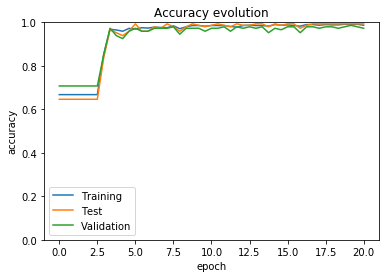

In [47]:
x = np.linspace(0, 20, model.history.shape[1])
plt.plot(x, model.history[0], label='Training')
plt.plot(x, model.history[1], label='Test')
plt.plot(x, model.history[2], label='Validation')
plt.ylim(0, 1)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy evolution')
plt.legend()
plt.savefig('accuracy_evolution.png')
plt.show()

In [48]:
#model_path = os.path.join(cwd, 'model.ckpt')
#model.save(model_path)

In [49]:
model.print_test_accuracy()

Accuracy on Test-Set: 99.3% (146 / 147)


Accuracy on Test-Set: 99.3% (146 / 147)
Example errors:


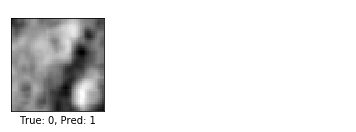

In [50]:
model.print_test_accuracy(show_example_errors=True)

Accuracy on Test-Set: 99.3% (146 / 147)
Example errors:


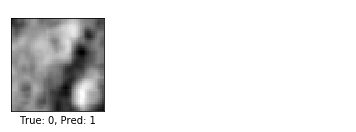

Confusion Matrix:
[[94  1]
 [ 0 52]]


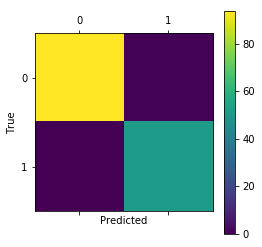

In [51]:
model.print_test_accuracy(show_example_errors=True,
                          show_confusion_matrix=True)

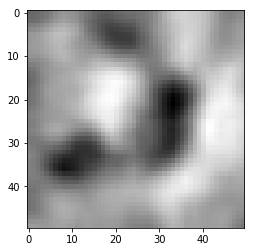

In [52]:
image1 = data.test.images[7]
plot_image(image1)

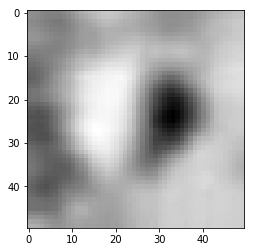

In [53]:
image2 = data.test.images[14]
plot_image(image2)

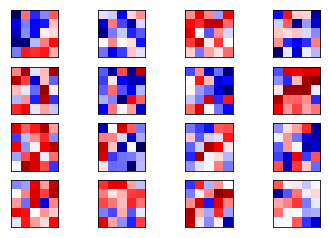

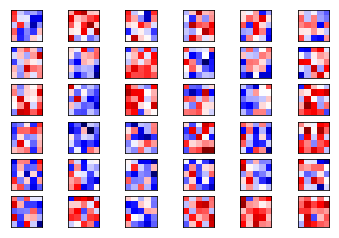

In [54]:
weights = model.filters_weights
plot_conv_weights(weights=weights[0])
plot_conv_weights(weights=weights[1])

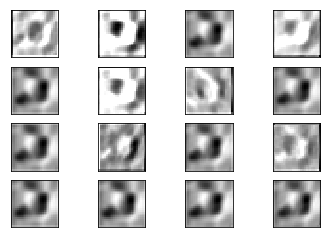

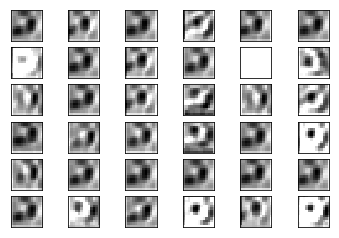

In [55]:
values = model.get_filters_activations(image1)
plot_conv_layer(values=values[0])
plot_conv_layer(values=values[1])

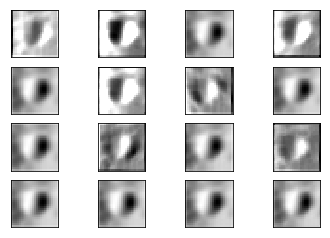

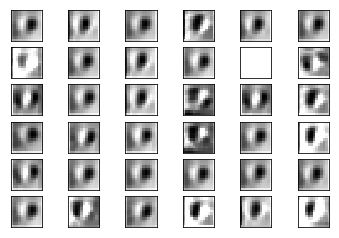

In [56]:
values = model.get_filters_activations(image2)
plot_conv_layer(values=values[0])
plot_conv_layer(values=values[1])

In [57]:
image1.shape

(2500,)

In [58]:
print(model.predict([image1]))

[[  4.80393821e-04   9.99519587e-01]]


In [59]:
prob_non_crater, prob_crater = model.predict([image1])[0]
print("Results, %.2f%% probability of being a crater" % (prob_crater*100))

Results, 99.95% probability of being a crater


In [60]:
result = data.test.cls[0], data.test.labels[0], model.predict([data.test.images[0]])
print(result)

(0, array([1, 0]), array([[ 0.99853599,  0.00146396]], dtype=float32))
